<a href="https://colab.research.google.com/github/AdamChoong0095/NUS-Stock-Data/blob/Shan-Li/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [19]:
import yfinance as yf

# Combined list of top 20 stocks by index weight of S&P500
top_20 = ['AAPL', 'NVDA', 'MSFT', 'AMZN', 'META', 'GOOGL', 'AVGO', 'BRK.B', 'GOOG', 'LLY', 'TSLA', 'JPM', 'UNH',"XOM","V","MA","HD","PG","COST","JNJ","WMT"]
industries = {}

# Get industry data
for stock in top_20:
    stocks = yf.Ticker(stock)
    industries[stock] = stocks.info.get('sector', 'N/A')

# Convert to DataFrame
industry_df = pd.DataFrame(list(industries.items()), columns=['Stock', 'Industry'])

# Create a DataFrame named 'data' with a column 'Stock'
data = pd.DataFrame({'Stock': top_20})

# Merge industry data with the main dataset
data_top_20 = pd.merge(data, industry_df, on='Stock', how='left')
# drop rows with industry = N/A
data_top_20 = data_top_20[data_top_20['Industry'] != 'N/A']
data_top_20.index = range(1, len(data_top_20) + 1)

print(data_top_20)

    Stock                Industry
1    AAPL              Technology
2    NVDA              Technology
3    MSFT              Technology
4    AMZN       Consumer Cyclical
5    META  Communication Services
6   GOOGL  Communication Services
7    AVGO              Technology
8    GOOG  Communication Services
9     LLY              Healthcare
10   TSLA       Consumer Cyclical
11    JPM      Financial Services
12    UNH              Healthcare
13    XOM                  Energy
14      V      Financial Services
15     MA      Financial Services
16     HD       Consumer Cyclical
17     PG      Consumer Defensive
18   COST      Consumer Defensive
19    JNJ              Healthcare
20    WMT      Consumer Defensive


In [20]:
# Choose stocks in top 4 sector weighting for SPY: Tehcnology, Financial Services, Healthcare, Consumer Cyclical Industry
# Stocks in Tehcnology Industry in top 20
tech_stocks = data_top_20[data_top_20['Industry'] == 'Technology']

# Stocks in Financial Services Industry in top 20
financial_services_stocks = data_top_20[data_top_20['Industry'] == 'Financial Services']

# Stocks in Healthcare Industry in top 20
healthcare_stocks = data_top_20[data_top_20['Industry'] == 'Healthcare']

# Stocks in Consumer Cyclical Industry in top 20
consumer_cyclical_stocks = data_top_20[data_top_20['Industry'] == 'Consumer Cyclical']

# Combine the dataframes
df_industries = pd.concat([tech_stocks, financial_services_stocks, healthcare_stocks, consumer_cyclical_stocks])

print(df_industries)

   Stock            Industry
1   AAPL          Technology
2   NVDA          Technology
3   MSFT          Technology
7   AVGO          Technology
11   JPM  Financial Services
14     V  Financial Services
15    MA  Financial Services
9    LLY          Healthcare
12   UNH          Healthcare
19   JNJ          Healthcare
4   AMZN   Consumer Cyclical
10  TSLA   Consumer Cyclical
16    HD   Consumer Cyclical


## EDA on Stocks

In [21]:
stock_file = ["aapl.us.txt","nvda.us.txt","msft.us.txt","avgo.us.txt","jpm.us.txt","v.us.txt","ma.us.txt","lly.us.txt","unh.us.txt","jnj.us.txt","amzn.us.txt","tsla.us.txt","hd.us.txt"]
#check the entire period for stocks of interest
start_date={}
for file in stock_file:
    stock = pd.read_csv("/content/drive/MyDrive/cs3244_data/Stocks/"+file)
    start_date[file] = stock['Date'].min()
    print(f"Data for {file} starts from {stock['Date'].min()} to {stock['Date'].max()}")


Data for aapl.us.txt starts from 1984-09-07 to 2017-11-10
Data for nvda.us.txt starts from 1999-01-22 to 2017-11-10
Data for msft.us.txt starts from 1986-03-13 to 2017-11-10
Data for avgo.us.txt starts from 2009-08-05 to 2017-11-10
Data for jpm.us.txt starts from 1970-01-02 to 2017-11-10
Data for v.us.txt starts from 2008-03-18 to 2017-11-10
Data for ma.us.txt starts from 2006-05-24 to 2017-11-10
Data for lly.us.txt starts from 1982-01-04 to 2017-11-10
Data for unh.us.txt starts from 1990-03-26 to 2017-11-10
Data for jnj.us.txt starts from 1970-01-02 to 2017-11-10
Data for amzn.us.txt starts from 1997-05-16 to 2017-11-10
Data for tsla.us.txt starts from 2010-06-28 to 2017-11-10
Data for hd.us.txt starts from 1981-09-22 to 2017-11-10


In [22]:
#get the latest stock start date
start_date = max(start_date.values())
print(f"The latest stock start date is {start_date}")

The latest stock start date is 2010-06-28


#### Hypothesis 1: Correlation between Volume and Changes in Price
###### Strong correlation between trading volumes and percentage change in price based on **opening and closing prices**

In [24]:
# get correlation for all stocks
corr = []
for file in stock_file:
    stock = pd.read_csv("/content/drive/MyDrive/cs3244_data/Stocks/"+file)
    missing_val = stock.isnull().sum()
    if missing_val.sum() > 0:
        print(f"Missing values in {file}")
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock = stock[stock['Date'] >= start_date]
    stock['Change'] = np.abs(stock['Close'] - stock['Open']) / stock['Open'] * 100
    correlation = stock['Volume'].corr(stock['Change'])
    corr.append(correlation)

# get name of stocks from file name and capitalize
stock_name = []
for file in stock_file:
    stock_name.append(file.split(".")[0])
stock_name = [x.upper() for x in stock_name]

# create a dataframe with stock name and correlation
correlation_df = pd.DataFrame(list(zip(stock_name, corr)), columns=['Stock', 'Correlation'])
print(correlation_df)

# calculate the average correlation
average_correlation = correlation_df['Correlation'].mean()
print(f'Average correlation coefficient: {average_correlation}')

   Stock  Correlation
0   AAPL     0.402873
1   NVDA     0.594237
2   MSFT     0.341510
3   AVGO     0.229031
4    JPM     0.503507
5      V     0.569272
6     MA     0.527601
7    LLY     0.287326
8    UNH     0.429373
9    JNJ     0.262933
10  AMZN     0.539833
11  TSLA     0.322830
12    HD     0.424483
Average correlation coefficient: 0.4180620265217106


#### Evaluation
- The average correlation coefficient is 0.4181, which indicates a weak correlation between trading volume and percentage change in stock price based on daily opening and closing prices.
- The use of daily opening and closing prices can overlook important price movements that occur throughout the trading day which can be influenced by news events, market sentiment or trading strategies.
- Intraday price movements may provide a better insight into the relationship between trading volume and stock price change as opening and closing prices may not reflect the accurate fluctuations in prices on certain trading days.


#### Hypothesis 2: Correlation between Volume and Changes in Price
###### Strong correlation between trading volumes and percentage change in price based on **intraday (high,low) prices**

In [8]:
# get correlation for all stocks
corr = []
for file in stock_file:
    stock = pd.read_csv("/content/drive/MyDrive/cs3244_data/Stocks/"+file)
    missing_val = stock.isnull().sum()
    if missing_val.sum() > 0:
        print(f"Missing values in {file}")
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock = stock[stock['Date'] >= start_date]
    stock['Change'] = np.abs(stock['High'] - stock['Low']) / stock['Low'] * 100
    correlation = stock['Volume'].corr(stock['Change'])
    corr.append(correlation)

# get name of stocks from file name and capitalize
stock_name = []
for file in stock_file:
    stock_name.append(file.split(".")[0])
stock_name = [x.upper() for x in stock_name]

# create a dataframe with stock name and correlation
correlation_df = pd.DataFrame(list(zip(stock_name, corr)), columns=['Stock', 'Correlation'])
print(correlation_df)

# calculate the average correlation
average_correlation = correlation_df['Correlation'].mean()
print(f'Average correlation coefficient: {average_correlation}')

   Stock  Correlation
0   AAPL     0.559295
1   NVDA     0.756574
2   MSFT     0.490027
3   AVGO     0.344268
4    JPM     0.638036
5      V     0.667854
6     MA     0.672747
7    LLY     0.342679
8    UNH     0.596457
9    JNJ     0.387538
10  AMZN     0.696114
11  TSLA     0.130743
12    HD     0.495311
Average correlation coefficient: 0.521357122948271


#### Evaluation
- The average correlation coefficient has increased to 0.5214, which indicates a stronger correlation between trading volume and percentage change in stock price based on intraday trading prices.
- This shows that intraday price movements provide a more comprehensive view of the relationship between changes in stock prices and trading volume compared to opening and closing prices.
- For example, a stock might open at a certain price, spike or drop significantly during the day, and close at a price near the opening price. Using price change in opening and closing prices would fail to reflect the volatility of trading activity throughout the session.

#### Hypothesis 3: Price volatility across different industries
###### Stocks in the technology industry have higher volatility compared to other industries


In [25]:
# volatility is the std of a stock's annualised returns over a given period
# calculate votality for all stocks in the stock list
volatility = []
for file in stock_file:
    stock = pd.read_csv("/content/drive/MyDrive/cs3244_data/Stocks/"+file)
    missing_val = stock.isnull().sum()
    if missing_val.sum() > 0:
        print(f"Missing values in {file}")
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock = stock[stock['Date'] >= start_date]
    stock["Daily Return"]=stock["Close"].pct_change()*100
    # average of 21 trading days monthly
    stock['Monthly Volatility'] = stock['Daily Return'].rolling(window=21).std()
    stock = stock.dropna()
    # 252 trading days in a year
    stock['Annualised Volatility'] = stock['Monthly Volatility'] * np.sqrt(252)
    volatility.append(stock['Annualised Volatility'].mean())

# get name of stocks from file name and capitalize
stock_name = []
for file in stock_file:
    stock_name.append(file.split(".")[0])
stock_name = [x.upper() for x in stock_name]

# create a dataframe with stock name, volatility and industry
volatility_df = pd.DataFrame(list(zip(stock_name, volatility)), columns=['Stock', 'Average Volatility'])
volatility_df = pd.merge(volatility_df, industry_df, on='Stock', how='left')
print(volatility_df)
print("---------------------------------------------------")

# calculate average volatility grouped by industry
average_volatility = volatility_df.groupby('Industry').mean("Average Volatility")
print(average_volatility.sort_values(by='Average Volatility', ascending=False))

   Stock  Average Volatility            Industry
0   AAPL           23.488060          Technology
1   NVDA           35.272842          Technology
2   MSFT           20.934503          Technology
3   AVGO           32.864686          Technology
4    JPM           23.343221  Financial Services
5      V           21.550197  Financial Services
6     MA           22.386019  Financial Services
7    LLY           18.552874          Healthcare
8    UNH           21.096308          Healthcare
9    JNJ           13.023160          Healthcare
10  AMZN           28.774491   Consumer Cyclical
11  TSLA           47.252749   Consumer Cyclical
12    HD           18.245285   Consumer Cyclical
---------------------------------------------------
                    Average Volatility
Industry                              
Consumer Cyclical            31.424175
Technology                   28.140023
Financial Services           22.426479
Healthcare                   17.557447


#### Evaluation
- `average_volatility` highlights the varying degrees of risk associated with investing in the chosen industries, with Consumer Cyclical being the most volatile and Healthcare the least.
- Broad market trends and global economic factors may have a greater impact on stock volatility than industry classification, highlighting the importance of diversification in a portfolio.
- Therefore, choosing SPY which has a broad market exposure, encompassing various sectors such as technology, healthcare, finance, etc. reduces the risk associated with individual sectors and ensures the dataset is a good representative of the stock market.


#### Hypothesis 4: Seasonal Patterns on Stock Prices
###### Best and worst months for the stock market

In [30]:
# get the month for the highest avg price for all stocks in the stock list
max_month = []
for file in stock_file:
    stock = pd.read_csv("/content/drive/MyDrive/cs3244_data/Stocks/"+file)
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock = stock[stock['Date'] >= start_date]
    stock['Month'] = stock['Date'].dt.month
    stock['Year'] = stock['Date'].dt.year
    average_price = stock.groupby(['Year', 'Month'])['High'].mean().reset_index()
    # get the maximum price for each year
    max_price = []
    for year in average_price['Year'].unique():
        max_price.append(average_price[average_price['Year'] == year].sort_values(by='High', ascending = False).head(1))
    max_price = pd.concat(max_price)
    # average the month column to get the best months across years
    best_month = max_price['Month'].mean().round(0).astype(int)
    max_month.append(best_month)

# add in quarter of the year based on max month
quarter = []
for month in max_month:
    if month in [1, 2, 3]:
        quarter.append('Q1')
    elif month in [4, 5, 6]:
        quarter.append('Q2')
    elif month in [7, 8, 9]:
        quarter.append('Q3')
    else:
        quarter.append('Q4')

# get name of stocks from file name and capitalize
stock_name = []
for file in stock_file:
    stock_name.append(file.split(".")[0])
stock_name = [x.upper() for x in stock_name]

# get industry of stocks
industry = []
for stock in stock_name:
    industry.append(industries[stock])

# create a dataframe with stock name, month with highest average closing price and industry
max_month_df = pd.DataFrame(list(zip(stock_name, max_month, quarter, industry)), columns=['Stock', 'Month', "Quarter", 'Industry'])
max_month_df["Type"] = "Best"
print(max_month_df)

   Stock  Month Quarter            Industry  Type
0   AAPL     10      Q4          Technology  Best
1   NVDA      9      Q3          Technology  Best
2   MSFT      9      Q3          Technology  Best
3   AVGO     10      Q4          Technology  Best
4    JPM      9      Q3  Financial Services  Best
5      V     11      Q4  Financial Services  Best
6     MA     12      Q4  Financial Services  Best
7    LLY      9      Q3          Healthcare  Best
8    UNH     10      Q4          Healthcare  Best
9    JNJ     10      Q4          Healthcare  Best
10  AMZN     10      Q4   Consumer Cyclical  Best
11  TSLA      8      Q3   Consumer Cyclical  Best
12    HD     11      Q4   Consumer Cyclical  Best


In [11]:
# get the month for the lowest avg price for all stocks in the stock list
min_month = []
for file in stock_file:
    stock = pd.read_csv("/content/drive/MyDrive/cs3244_data/Stocks/"+file)
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock = stock[stock['Date'] >= start_date]
    stock['Month'] = stock['Date'].dt.month
    stock['Year'] = stock['Date'].dt.year
    average_price = stock.groupby(['Year', 'Month'])['Low'].mean().reset_index()
    # get the minimum price for each year
    min_price = []
    for year in average_price['Year'].unique():
        min_price.append(average_price[average_price['Year'] == year].sort_values(by='Low').head(1))
    min_price = pd.concat(min_price)
    # average the month column to get the worst months across years
    worst_month = min_price['Month'].mean().round(0).astype(int)
    min_month.append(worst_month)

# add in quarter of the year based on min month
quarter = []
for month in min_month:
    if month in [1, 2, 3]:
        quarter.append('Q1')
    elif month in [4, 5, 6]:
        quarter.append('Q2')
    elif month in [7, 8, 9]:
        quarter.append('Q3')
    else:
        quarter.append('Q4')

# get name of stocks from file name and capitalize
stock_name = []
for file in stock_file:
    stock_name.append(file.split(".")[0])
stock_name = [x.upper() for x in stock_name]

# get industry of stocks
industry = []
for stock in stock_name:
    industry.append(industries[stock])

# create a dataframe with stock name, month with highest average closing price and industry
min_month_df = pd.DataFrame(list(zip(stock_name, min_month, quarter, industry)), columns=['Stock', 'Month', "Quarter", 'Industry'])
min_month_df["Type"] = "Worst"
print(min_month_df)

   Stock  Month Quarter            Industry   Type
0   AAPL      4      Q2          Technology  Worst
1   NVDA      4      Q2          Technology  Worst
2   MSFT      4      Q2          Technology  Worst
3   AVGO      2      Q1          Technology  Worst
4    JPM      4      Q2  Financial Services  Worst
5      V      3      Q1  Financial Services  Worst
6     MA      2      Q1  Financial Services  Worst
7    LLY      4      Q2          Healthcare  Worst
8    UNH      2      Q1          Healthcare  Worst
9    JNJ      4      Q2          Healthcare  Worst
10  AMZN      3      Q1   Consumer Cyclical  Worst
11  TSLA      2      Q1   Consumer Cyclical  Worst
12    HD      3      Q1   Consumer Cyclical  Worst


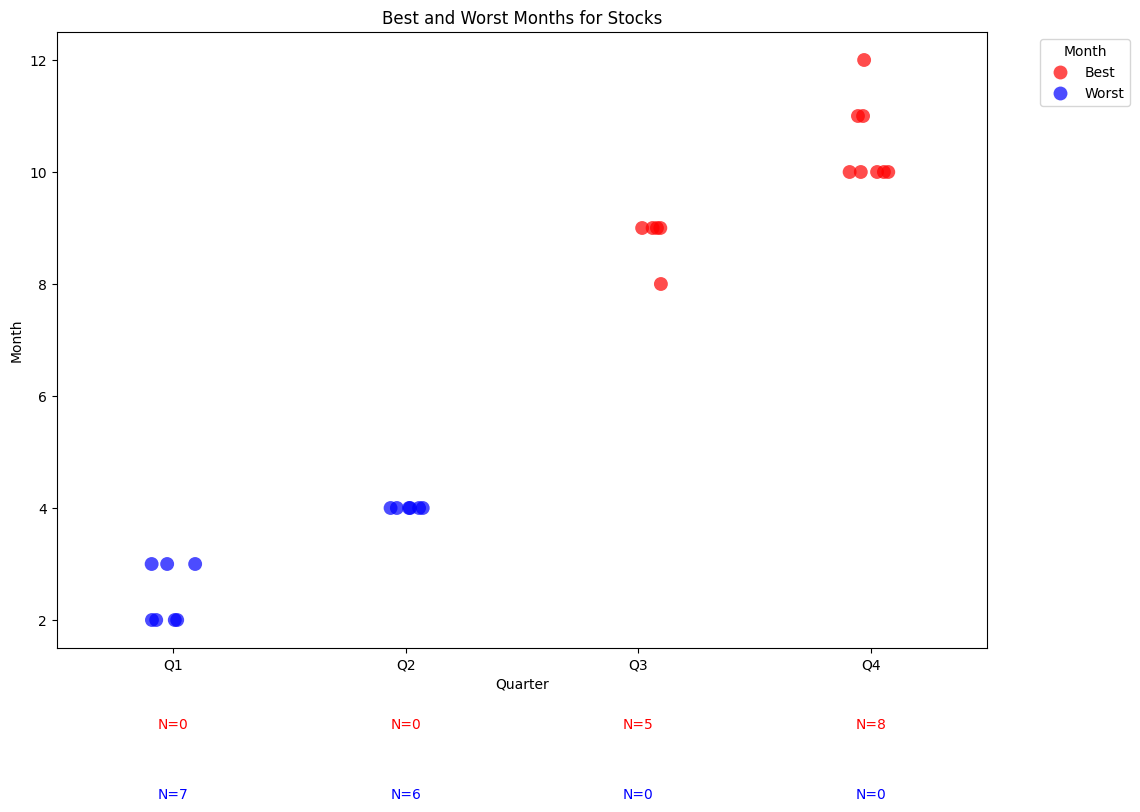

In [12]:
# combine the dataframes
month_df = pd.merge(max_month_df, min_month_df, on='Stock', how='left')

#convert the quarter columns to categorical with a specific order
quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']
month_df['Quarter_x'] = pd.Categorical(month_df['Quarter_x'], categories=quarter_order, ordered=True)
month_df['Quarter_y'] = pd.Categorical(month_df['Quarter_y'], categories=quarter_order, ordered=True)

#count points for each quarter
count_best = month_df['Quarter_x'].value_counts().reindex(quarter_order)
count_worst = month_df['Quarter_y'].value_counts().reindex(quarter_order)

# plot a visualisation coloured by best & worst months
plt.figure(figsize=(12, 8))

sns.stripplot(data=month_df, x="Quarter_x", y="Month_x",
               hue="Type_x", dodge=True, s=10, palette={'Best': 'red'}, alpha=0.7)
sns.stripplot(data=month_df, x="Quarter_y", y="Month_y",
               hue="Type_y", dodge=True, s=10,  palette={'Worst': 'blue'}, alpha=0.7)

#add counts to the plot
for quarter in quarter_order:
    plt.text(x=quarter, y=0, s=f'N={count_best[quarter]}', ha='center', va='bottom', color='red', fontsize=10)
    plt.text(x=quarter, y=-1, s=f'N={count_worst[quarter]}', ha='center', va='top', color='blue', fontsize=10)

# add labels and title
plt.xlabel('Quarter')
plt.ylabel('Month')
plt.title('Best and Worst Months for Stocks')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



#### Evaluation
- The scatterplot above provides a clear overview of seasonal patterns in stock prices, highlighting the `best` and `worst` months with the highest and lowest average prices respectively, together with its corresponding quarter.
- The best months are concentrated in Q4 while the worst months are equally distributed in Q1 & Q2 across the chosen industries.
- The strong performance in Q4 could be attributed to increased consumer spending during the holiday season leading to a seasonal boost which results in positive earnings reports that can drive stock prices higher.
-  Conversely, the lower average prices in the first half of the year may not only reflect investors' reassessment of their portfolios after holiday spending but also the challenges faced by companies such as post-holiday sales decline or slow start in the new fiscal year which can negatively impact stock performance.
- Since earnings reports occur at the end of every quarter for US companies, it is possible that earnings report does contribute to the `best` and `worst` months of stock prices.

## EDA on ETFs

In [13]:
etf_file = ["spy.us.txt","ivv.us.txt","voo.us.txt","vti.us.txt","qqq.us.txt"]
#check the entire period for etfs of interest
start_date={}
for file in etf_file:
    etf = pd.read_csv("/content/drive/MyDrive/cs3244_data/ETFs/"+file)
    start_date[file] = etf['Date'].min()
    print(f"Data for {file} starts from {etf['Date'].min()} to {etf['Date'].max()}")

Data for spy.us.txt starts from 2005-02-25 to 2017-11-10
Data for ivv.us.txt starts from 2005-02-25 to 2017-11-10
Data for voo.us.txt starts from 2010-09-14 to 2017-11-10
Data for vti.us.txt starts from 2005-02-25 to 2017-11-10
Data for qqq.us.txt starts from 1999-03-10 to 2017-11-10


In [14]:
#get the latest etf start date
start_date = max(start_date.values())
print(f"The latest etf start date is {start_date}")

The latest etf start date is 2010-09-14


#### Hypothesis 1: Average trading volumes of ETFs
###### SPY will the highest average trading volume

In [15]:
trading_volume = []
for file in etf_file:
    etf = pd.read_csv("/content/drive/MyDrive/cs3244_data/ETFs/"+file)
    missing_val = etf.isnull().sum()
    if missing_val.sum() > 0:
        print(f"Missing values in {file}")
    etf['Date'] = pd.to_datetime(etf['Date'])
    etf = etf[etf['Date'] >= start_date]
    # get average trading volume
    etf['Volume'] = etf['Volume'] / 1000000
    trading_volume.append(round(etf['Volume'].mean(),2))

# get names of ETFs from file name and capitalize
etf_name = []
for file in etf_file:
    etf_name.append(file.split(".")[0])
etf_name = [x.upper() for x in etf_name]

# create a dataframe with ETF name and average trading volume
trading_volume_df = pd.DataFrame(list(zip(etf_name, trading_volume)), columns=['ETF', 'Average Trading Volume (in Millions)'])
trading_volume_df.sort_values(by='Average Trading Volume (in Millions)', ascending=False).reset_index(drop=True)

,ETF,Average Trading Volume (in Millions)
0,SPY,140.17
1,QQQ,40.75
2,IVV,4.20
3,VTI,2.61
4,VOO,1.32


#### Evaluation
- SPY has the highest trading volume, reflecting how SPY is one of the most actively traded ETFs in the world. Its high trading volume gives it high liquidity allowing investors to buy and sell without causing significant daily price movement of the ETF.
- In our case, it is also crucial for machine learning model as it ensures that the data used for training and validation reflects real market conditions without significant price impact from trades.

#### Hypothesis 2: Performance Comparison Among ETFs using Annualised Returns
###### SPY, IVV, and VOO will have very close annualized returns as they track the S&P 500 index compared to VTI and QQQ.

In [16]:
annualized_return_percentage = []
for file in etf_file:
    etf = pd.read_csv("/content/drive/MyDrive/cs3244_data/ETFs/" + file)
    #calculate beginning and ending etf prices
    beginning_value = etf['Close'].iloc[0]
    ending_value = etf['Close'].iloc[-1]
    #calculate the number of years
    etf['Date'] = pd.to_datetime(etf['Date'])
    etf = etf[etf['Date'] >= start_date]
    etf = etf.sort_values('Date')
    n = (etf['Date'].iloc[-1] - etf['Date'].iloc[0]).days / 365
    #calculate annualized return
    annualized_return = (ending_value / beginning_value) ** (1 / n) - 1
    #convert to percentage and round to 2 decimal places
    annualized_return_percentage.append(round(annualized_return * 100, 2))


# Get names of ETFs from filenames and capitalize
etf_name = [file.split(".")[0].upper() for file in etf_file]

# Create a DataFrame with ETF names and annualized returns
annualized_return_df = pd.DataFrame(list(zip(etf_name, annualized_return_percentage)), columns=['ETF', 'Annualized Return (%)'])
annualized_return_df.sort_values(by='Annualized Return (%)', ascending=False).reset_index(drop=True)

,ETF,Annualized Return (%)
0,QQQ,18.47
1,VOO,14.48
2,VTI,13.91
3,IVV,13.36
4,SPY,13.26


#### Evaluation
- QQQ, which tracks the Nasdaq-100 index, has the highest annualized return at 18.47%, indicating strong performance likely driven by its tech-heavy composition. This sector-specific focus can lead to higher returns especially in bullish technology and growth markets.
- SPY (13.26%), IVV (13.36%) and VOO (14.48%) show similar annualized returns, reflecting their shared focus on large-cap US equities as they all track the S&P 500 index, which includes the largest US companies across various sectors.

#### Hypothesis 3: Volatility Comparison Among ETFs

In [17]:
volatility = []
for file in etf_file:
    etf = pd.read_csv("/content/drive/MyDrive/cs3244_data/ETFs/"+file)
    missing_val = etf.isnull().sum()
    if missing_val.sum() > 0:
        print(f"Missing values in {file}")
    etf['Date'] = pd.to_datetime(etf['Date'])
    etf = etf[etf['Date'] >= start_date]
    etf["Daily Return"]=etf["Close"].pct_change()*100
    # average of 21 trading days monthly
    etf['Monthly Volatility'] = etf['Daily Return'].rolling(window=21).std()
    etf = etf.dropna()
    # 252 trading days in a year
    etf['Annualised Volatility'] = etf['Monthly Volatility'] * np.sqrt(252)
    volatility.append(round(etf['Annualised Volatility'].mean(),2))

# print the average volatility for each ETF
volatility_df = pd.DataFrame(list(zip(etf_name, volatility)), columns=['ETF', 'Average Volatility'])
volatility_df.sort_values(by='Average Volatility', ascending=False).reset_index(drop=True)

,ETF,Average Volatility
0,QQQ,14.89
1,VTI,13.01
2,VOO,12.72
3,SPY,12.68
4,IVV,12.67


#### Evaluation
- With the highest average volatility at 14.89%, QQQ reflects the risk associated with its tech-heavy composition. This elevated volatility in stock prices is typical for tech-focused investments which can experience significant price fluctuations due to market sentiment and sector-specific developments, especially during market downturns.
- Similar to the annualized returns, the average volatility of VOO, SPY, and IVV is comparable.
- Popular ETFs such as SPY, evident from its highest trading volumes, tend to have a more stable asset base i.e. lower volatility which reduces the risk of large liquidations that can be disruptive to an ETF's performance. This stability is advantageous for our machine learning model as it reduces noise in the data, allowing algorithms to learn more effectively.

In [18]:
#merge annualised returns with volatility
returns_avgvolatility = pd.merge(annualized_return_df, volatility_df, on='ETF')
print(returns_avgvolatility.sort_values(by='Annualized Return (%)', ascending=False).reset_index(drop=True))

#compute correlation between return and average volatility
correlation = returns_avgvolatility['Annualized Return (%)'].corr(returns_avgvolatility['Average Volatility'])
print(f"Correlation between Annualized Return and Average Volatility: {correlation}")

   ETF  Annualized Return (%)  Average Volatility
0  QQQ                  18.47               14.89
1  VOO                  14.48               12.72
2  VTI                  13.91               13.01
3  IVV                  13.36               12.67
4  SPY                  13.26               12.68
Correlation between Annualized Return and Average Volatility: 0.9741398030220445


#### Correlation between Annualised Returns and Average Volatility

The correlation between annualized returns and average volatility for the ETFs analyzed is 0.97, indicating a strong positive relationship. This suggests that the average volatility of an ETF increases with its annualized returns. For example, QQQ, which has the highest annualized return of 18.47% also exhibits the highest volatility at 14.89%. In contrast, SPY, IVV, and VOO, which have lower annualized returns, also show lower volatility. This trend highlights the risk-return trade-off where higher potential returns often come with greater price fluctuations, making QQQ a less stable investment compared to the more stable options like SPY and VOO.

#### Conclusion
In our project, we chose SPY as the primary ETF to train our time series model due to its robust characteristics. With an annualized return of 13.26% and an average volatility of 12.68%, SPY offers a stable performance while still capturing the growth potential of large-cap US equities. Its high liquidity, indicated by an extremely high average trading volume of 140.17 million, ensures that the data used reflects real market dynamics, allowing for accurate predictions without significant price impact. Additionally, SPY's diversified market exposure across various sectors reduces noise in the dataset, making it easier for our model to identify meaningful patterns and trends. Selecting SPY as our training data enables us to not only create more reliable models for forecasting stock market behavior but also compare the accuracy between different models.